# Economic Analysis with Pandas

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred

# Loading environment variables
import os
from dotenv import load_dotenv
load_dotenv()
fred_api_key = os.environ.get('FRED_API_KEY')

# Initial settings
plt.style.use('fivethirtyeight')      # Default plotting style
pd.set_option('display.max_columns', 500)     

color_palette = plt.rcParams['axes.prop_cycle'].by_key()['color']     # Pulls all colors from plot style

In [2]:
fred = Fred(api_key=fred_api_key)     # establish reusable fred object

### Sample Search Data (S&P)

In [3]:
fred.search('S&P')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
SP500,SP500,2023-08-09,2023-08-09,S&P 500,2013-08-12,2023-08-09,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-08-09 19:11:00-05:00,82,The observations for the S&P 500 represent the...
VXVCLS,VXVCLS,2023-08-09,2023-08-09,CBOE S&P 500 3-Month Volatility Index,2007-12-04,2023-08-08,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-08-09 08:36:09-05:00,53,"Copyright, 2016, Chicago Board Options Exchang..."
VXOCLS,VXOCLS,2023-08-09,2023-08-09,CBOE S&P 100 Volatility Index: VXO (DISCONTINUED),1986-01-02,2021-09-23,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2021-09-24 08:36:03-05:00,29,This series is no longer being updated by the ...
CSUSHPINSA,CSUSHPINSA,2023-08-09,2023-08-09,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-05-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-07-25 08:11:01-05:00,90,"For more information regarding the index, plea..."
CSUSHPISA,CSUSHPISA,2023-08-09,2023-08-09,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-05-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-07-25 08:11:03-05:00,79,"For more information regarding the index, plea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CRDQHKBPABIS,CRDQHKBPABIS,2023-08-09,2023-08-09,Credit to Private Non-Financial Sector by Dome...,1978-10-01,2022-10-01,"Quarterly, End of Quarter",Q,Billions of Hong Kong Dollars,Bil. of Hong Kong $,Not Seasonally Adjusted,NSA,2023-06-12 13:03:08-05:00,3,"Credit is provided by domestic banks, all othe..."
CSHRCPCNA156NRUG,CSHRCPCNA156NRUG,2023-08-09,2023-08-09,Share of Residual Trade and GDP Statistical Di...,1952-01-01,2019-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2021-11-08 13:35:26-06:00,3,Source ID: csh_r When using these data in you...
CSHRCPTRA156NRUG,CSHRCPTRA156NRUG,2023-08-09,2023-08-09,Share of Residual Trade and GDP Statistical Di...,1950-01-01,2019-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2021-11-08 13:32:24-06:00,3,Source ID: csh_r When using these data in you...


In [4]:
snp_search = fred.search('S&P', order_by='popularity')
snp_search.head()     # first 5 in descending order

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-08-09,2023-08-09,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-08-08,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-08-09 09:24:05-05:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-08-09,2023-08-09,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-05-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-07-25 08:11:01-05:00,90,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-08-09,2023-08-09,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-08-08,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-08-09 09:24:08-05:00,83,This data represents the effective yield of th...
SP500,SP500,2023-08-09,2023-08-09,S&P 500,2013-08-12,2023-08-09,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-08-09 19:11:00-05:00,82,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-08-09,2023-08-09,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,81,Household data are collected as of March. As ...


## Pulling Raw Data and Plot

<Axes: title={'center': 'S&P 500'}>

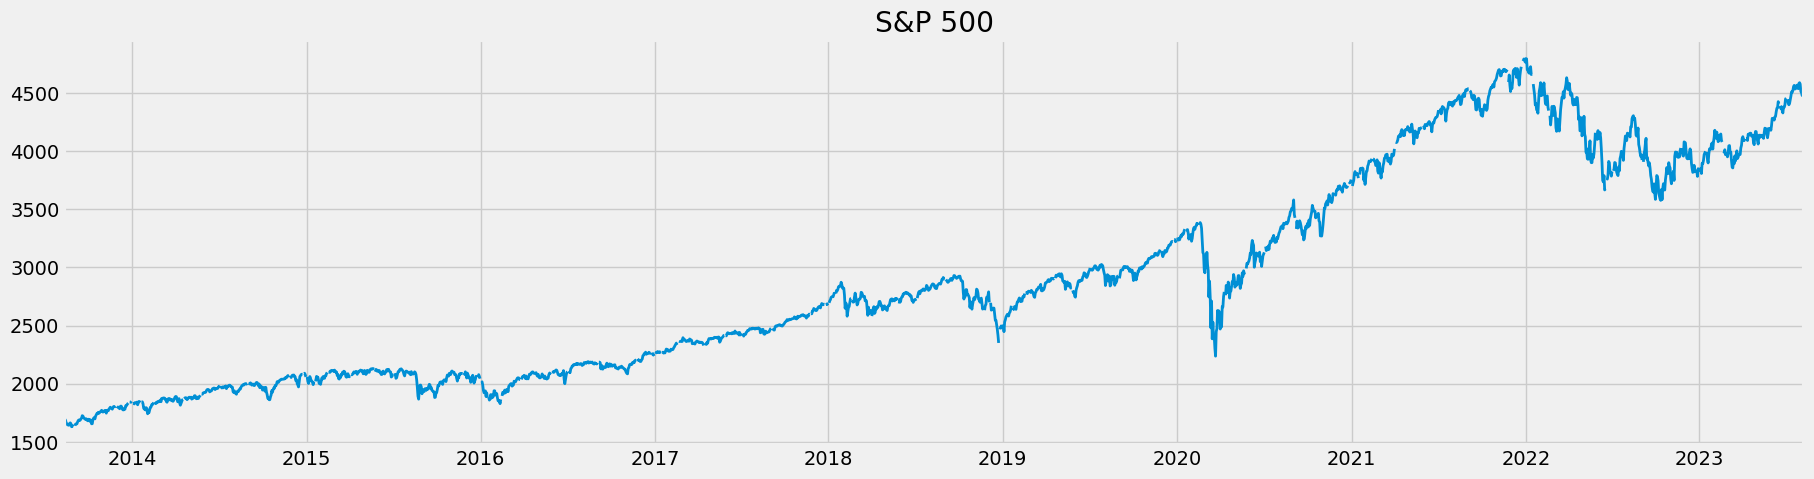

In [5]:
sp500 = fred.get_series(series_id = 'SP500')
sp500.plot(figsize=(20,5), title='S&P 500', lw=2)

<Axes: title={'center': 'NASDAQ Composite'}>

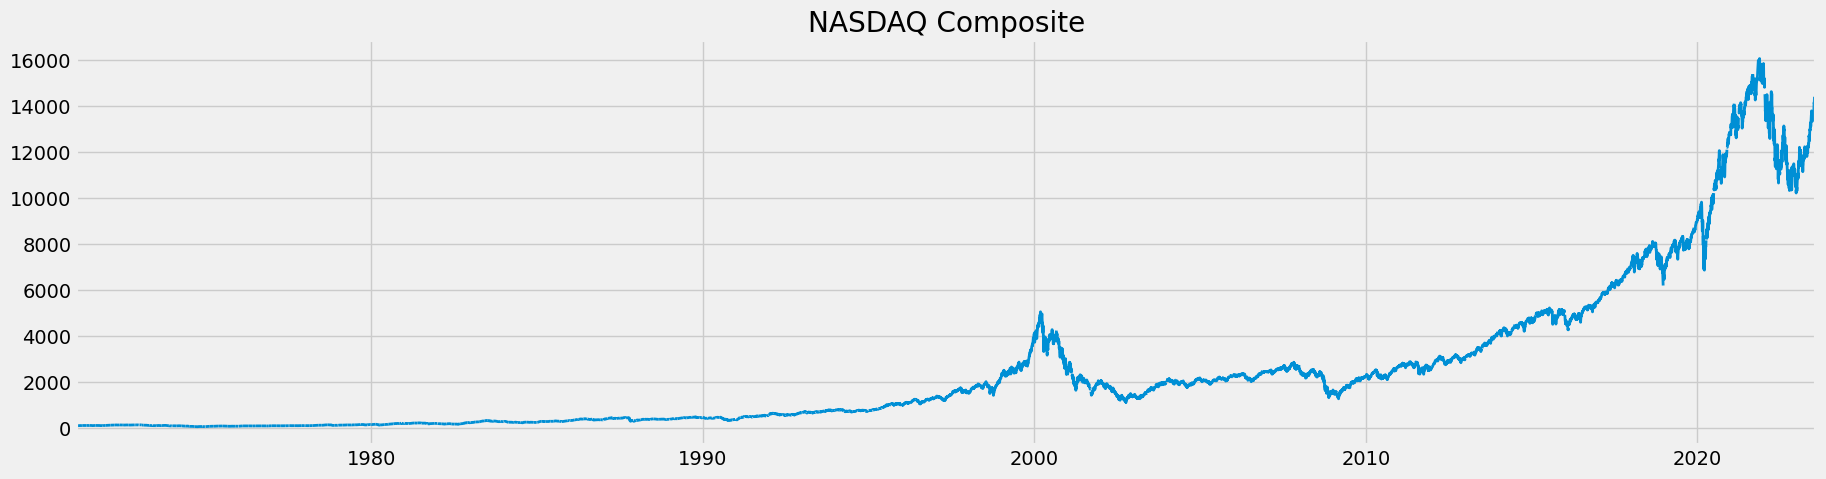

In [6]:
nasdaq = fred.get_series(series_id = 'NASDAQCOM')
nasdaq.plot(figsize=(20,5), title='NASDAQ Composite', lw=2)

<Axes: title={'center': 'Dow Jones Industrial Average'}>

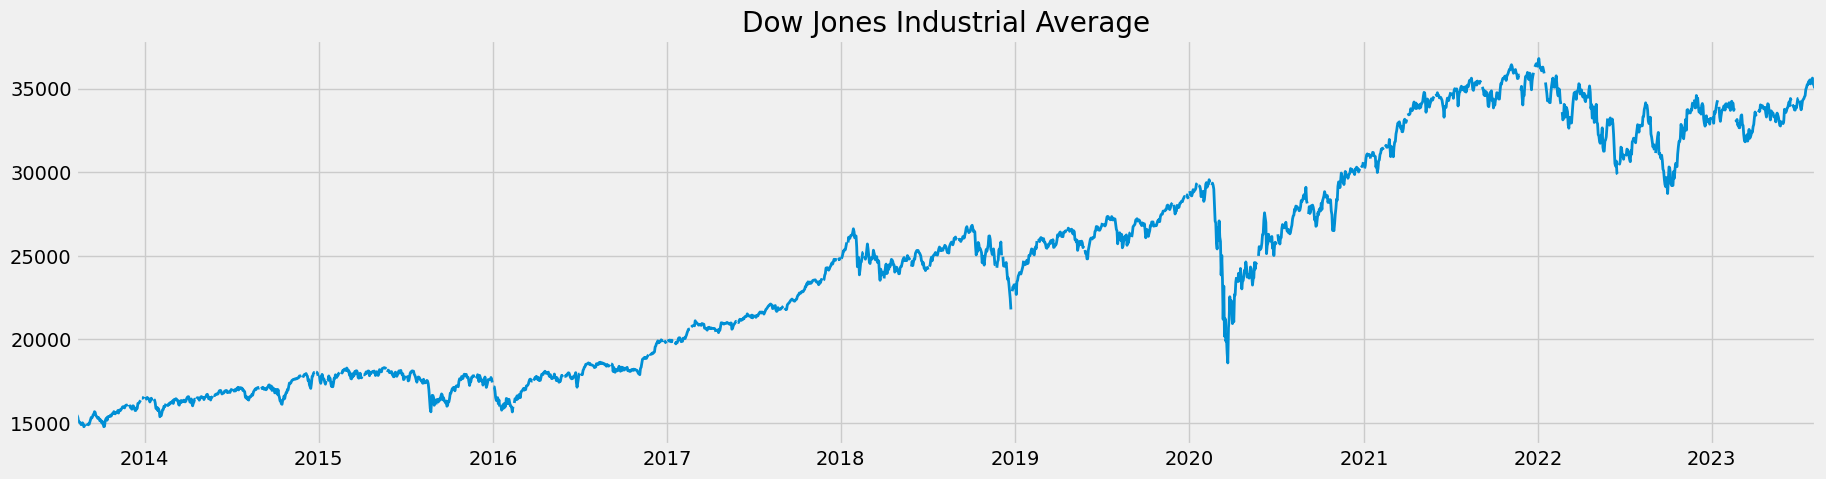

In [7]:
djia = fred.get_series(series_id = 'DJIA')
djia.plot(figsize=(20,5), title='Dow Jones Industrial Average', lw=2)

## Pull and Join Multiple Data Series

In [8]:
unemployment_results = fred.search('unemployment', order_by='popularity')
unemployment_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-08-09,2023-08-09,Unemployment Rate,1948-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:45:03-05:00,93,The unemployment rate represents the number of...
CPIAUCSL,CPIAUCSL,2023-08-09,2023-08-09,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2023-06-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2023-07-12 07:41:01-05:00,93,The Consumer Price Index for All Urban Consume...
PAYEMS,PAYEMS,2023-08-09,2023-08-09,"All Employees, Total Nonfarm",1939-01-01,2023-07-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-08-04 07:47:02-05:00,84,"All Employees: Total Nonfarm, commonly known a..."
ICSA,ICSA,2023-08-09,2023-08-09,Initial Claims,1967-01-07,2023-07-29,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-08-03 07:33:02-05:00,81,An initial claim is a claim filed by an unempl...
CES0500000003,CES0500000003,2023-08-09,2023-08-09,"Average Hourly Earnings of All Employees, Tota...",2006-03-01,2023-07-01,Monthly,M,Dollars per Hour,$ per Hour,Seasonally Adjusted,SA,2023-08-04 07:47:02-05:00,79,The series comes from the 'Current Employment ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NAPL912UR,NAPL912UR,2023-08-09,2023-08-09,Unemployment Rate in Naples-Immokalee-Marco Is...,1990-01-01,2023-06-01,Monthly,M,Percent,%,Smoothed Seasonally Adjusted,SSA,2023-08-02 13:32:39-05:00,3,None
LASST130000000000004,LASST130000000000004,2023-08-09,2023-08-09,Unemployed Persons in Georgia,1976-01-01,2023-06-01,Monthly,M,Persons,Persons,Seasonally Adjusted,SA,2023-08-02 10:09:01-05:00,3,These data come from the Current Population Su...
LBSNSA42,LBSNSA42,2023-08-09,2023-08-09,Labor Force Participation Rate for Pennsylvania,1976-01-01,2023-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-07-21 09:01:13-05:00,3,A state's labor-force participation rate is th...


<Axes: title={'center': 'Unemployment Rate'}>

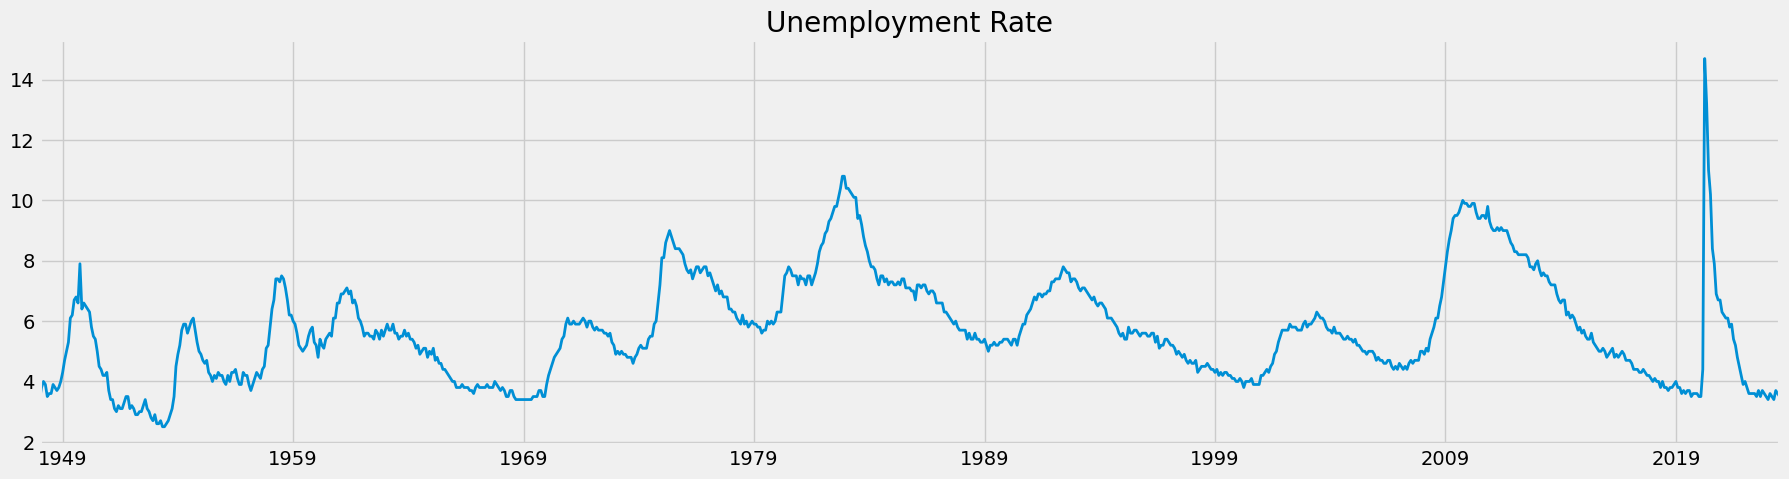

In [9]:
unrate = fred.get_series('UNRATE')
unrate.plot(figsize=(20,5), title='Unemployment Rate', lw=2)

In [10]:
unemployment_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemployment_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-08-09,2023-08-09,Unemployment Rate,1948-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:45:03-05:00,93,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-08-09,2023-08-09,Unemployment Rate,1948-01-01,2023-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-08-04 07:45:34-05:00,54,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-08-09,2023-08-09,Unemployment Rate - Black or African American,1972-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:45:23-05:00,67,The series comes from the 'Current Population ...
UNEMPLOY,UNEMPLOY,2023-08-09,2023-08-09,Unemployment Level,1948-01-01,2023-07-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-08-04 07:45:25-05:00,66,The series comes from the 'Current Population ...
LNU04000006,LNU04000006,2023-08-09,2023-08-09,Unemployment Rate - Black or African American,1972-01-01,2023-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-08-04 07:46:00-05:00,13,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ILWHURN,ILWHURN,2023-08-09,2023-08-09,"Unemployment Rate in White County, IL",1990-01-01,2023-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-08-02 10:26:54-05:00,3,These data come from the Current Population Su...
MTFLAT0URN,MTFLAT0URN,2023-08-09,2023-08-09,"Unemployment Rate in Flathead County, MT",1990-01-01,2023-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-08-02 10:22:21-05:00,3,These data come from the Current Population Su...
MSMNURN,MSMNURN,2023-08-09,2023-08-09,"Unemployment Rate in Montgomery County, MS",1990-01-01,2023-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-08-02 10:23:52-05:00,3,These data come from the Current Population Su...


In [11]:
unemployment_df = unemployment_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemployment_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-08-09,2023-08-09,Unemployment Rate,1948-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:45:03-05:00,93,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-08-09,2023-08-09,Unemployment Rate - Black or African American,1972-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:45:23-05:00,67,The series comes from the 'Current Population ...
U6RATE,U6RATE,2023-08-09,2023-08-09,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:45:30-05:00,65,The series comes from the 'Current Population ...
CAUR,CAUR,2023-08-09,2023-08-09,Unemployment Rate in California,1976-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-26 14:43:01-05:00,57,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-08-09,2023-08-09,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,49,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000037,LNS14000037,2023-08-09,2023-08-09,"Unemployment Rate - 20-24 Yrs., Men",1948-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:47:27-05:00,3,The series comes from the 'Current Population ...
LNS14000025,LNS14000025,2023-08-09,2023-08-09,"Unemployment Rate - 20 Yrs. & over, Men",1948-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:46:34-05:00,3,The series comes from the 'Current Population ...
LRUN24TTUSM156S,LRUN24TTUSM156S,2023-08-09,2023-08-09,Unemployment Rate: Aged 15-24: All Persons for...,1960-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-23 12:26:19-05:00,3,OECD descriptor ID: LRUN24TT OECD unit ID: STS...


In [12]:
# unemployment_df['title']
# unemployment_df['title'].str.contains('Unemployment Rate')
unemployment_df.loc[unemployment_df['title'].str.contains('Unemployment Rate')]

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-08-09,2023-08-09,Unemployment Rate,1948-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:45:03-05:00,93,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-08-09,2023-08-09,Unemployment Rate - Black or African American,1972-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:45:23-05:00,67,The series comes from the 'Current Population ...
CAUR,CAUR,2023-08-09,2023-08-09,Unemployment Rate in California,1976-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-26 14:43:01-05:00,57,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-08-09,2023-08-09,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,49,Series Is Presented Here As Three Variables--(...
M0892BUSM156SNBR,M0892BUSM156SNBR,2023-08-09,2023-08-09,Unemployment Rate for United States,1940-01-01,1946-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:29:19-05:00,11,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000037,LNS14000037,2023-08-09,2023-08-09,"Unemployment Rate - 20-24 Yrs., Men",1948-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:47:27-05:00,3,The series comes from the 'Current Population ...
LNS14000025,LNS14000025,2023-08-09,2023-08-09,"Unemployment Rate - 20 Yrs. & over, Men",1948-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:46:34-05:00,3,The series comes from the 'Current Population ...
LRUN24TTUSM156S,LRUN24TTUSM156S,2023-08-09,2023-08-09,Unemployment Rate: Aged 15-24: All Persons for...,1960-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-23 12:26:19-05:00,3,OECD descriptor ID: LRUN24TT OECD unit ID: STS...


In [13]:
unemployment_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemployment_df = unemployment_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemployment_df = unemployment_df.loc[unemployment_df['title'].str.contains('Unemployment Rate')]

In [14]:
unemployment_df.index

Index(['UNRATE', 'LNS14000006', 'CAUR', 'M0892AUSM156SNBR', 'M0892BUSM156SNBR',
       'TXUR', 'FLUR', 'LNS14000031', 'NYUR', 'LNS14000024', 'U2RATE',
       'LNS14024887', 'LNS14000002', 'LNS14000009', 'OHUR', 'ALUR', 'MIUR',
       'LNS14000003', 'COUR', 'ILUR', 'MAUR', 'PAUR', 'NCUR',
       'LRUN64TTUSM156S', 'WIUR', 'KYUR', 'NJUR', 'AZUR', 'LNS14027660',
       'GAUR', 'MNUR', 'SCUR', 'ORUR', 'INUR', 'LNS14000001', 'TNUR', 'WVUR',
       'MDUR', 'UTUR', 'OKUR', 'WAUR', 'VAUR', 'AKUR', 'LNS14027662', 'NVUR',
       'LAUR', 'NMUR', 'ARUR', 'MOUR', 'IAUR', 'LASMT261982000000003',
       'LNS14027659', 'LNS14000012', 'NDUR', 'LNS14032183', 'KSUR', 'CTUR',
       'MSUR', 'HIUR', 'NEUR', 'LNS14000036', 'LNS14000018', 'DCUR', 'SDUR',
       'PRUR', 'MTUR', 'DEUR', 'RIUR', 'NHUR', 'IDUR', 'LNS14000060',
       'LRHUTTTTUSM156S', 'WYUR', 'MEUR', 'LNS14000028',
       'LASMT391746000000003', 'VTUR', 'LNS14000032', 'CMWRUR', 'LNS14000038',
       'CSOUUR', 'LNS14027689', 'CNEWUR', 'LNS140000

In [15]:
#unemployment_df.index.sort_values(key=len)
#unemployment_df.index.sort_values()    # works

In [16]:
for myid in unemployment_df.index:
    results = fred.get_series(myid)
    break

In [17]:
print(results)
results.to_frame(name=myid)

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-03-01    3.5
2023-04-01    3.4
2023-05-01    3.7
2023-06-01    3.6
2023-07-01    3.5
Length: 907, dtype: float64


,UNRATE
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2023-03-01,3.5
2023-04-01,3.4
2023-05-01,3.7
2023-06-01,3.6


In [18]:
all_results = []

for myid in unemployment_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

print(type(all_results))
print(len(all_results))

<class 'list'>
100


In [19]:
all_results[3]

,M0892AUSM156SNBR
1929-04-01,0.69
1929-05-01,1.65
1929-06-01,2.06
1929-07-01,0.79
1929-08-01,0.04
...,...
1942-02-01,3.56
1942-03-01,3.22
1942-04-01,2.33
1942-05-01,1.22
